In [32]:
import numpy as np
import matplotlib.pyplot as plt

In [33]:
from keras import datasets


(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data(path="mnist.npz")

(X_train.shape, y_train.shape), (X_test.shape, y_test.shape)

(((60000, 28, 28), (60000,)), ((10000, 28, 28), (10000,)))

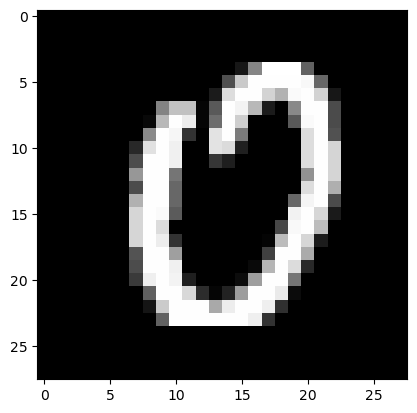

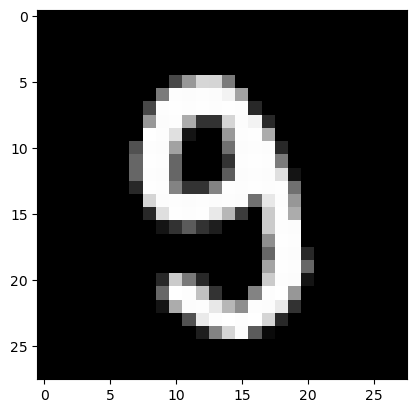

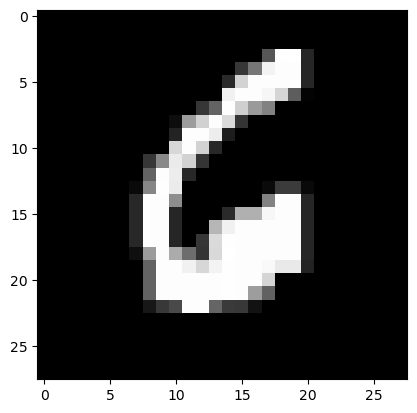

In [34]:
number_of_train_images = len(X_train)
number_of_train_images_to_show = 3
random_list_of_images_to_show = np.random.randint(0, number_of_train_images , number_of_train_images_to_show)

for i in random_list_of_images_to_show:
    plt.imshow(X_train[i], cmap='gray')
    plt.show()

In [35]:
X_train = X_train / 255.
X_test = X_test / 255.

In [36]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [37]:
from keras.ops import expand_dims

In [38]:
X_train = expand_dims(X_train, axis=-1)
X_test = expand_dims(X_test, axis=-1)

print(X_train.shape)
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [39]:
from keras.utils import to_categorical

y_train_cat = to_categorical(y_train, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10)

In [40]:
from keras import Sequential, Input, layers

def initialize_model():
    model = Sequential()
    model.add(Input(shape=(28, 28, 1)))

    model.add(layers.Conv2D(8, (4,4), activation='relu', padding='same'))
    model.add(layers.MaxPool2D(pool_size=(2,2)))

    model.add(layers.Conv2D(16, (3,3), activation='relu', padding='same'))
    model.add(layers.MaxPool2D(pool_size=(2,2)))

    model.add(layers.Flatten())

    model.add(layers.Dense(10, activation='relu'))

    model.add(layers.Dense(10, activation='softmax'))

    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

    return model

In [41]:
model = initialize_model()
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 28, 28, 8)      │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 14, 14, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 14, 14, 16)     │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 7, 7, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         7,850 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           110 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,264 (36.19 KB)

 Trainable params: 9,264 (36.19 KB)

 Non-trainable params: 0 (0.00 B)

In [42]:
first_layer_weights = 8 * (4*4) * 1 + 8
first_layer_weights

136

In [43]:
second_layer_weights = 16 * (3*3) * 8 + 16
second_layer_weights

1168

In [44]:
third_layer_weights = 10 * 7 * 7 * 16 + 10
third_layer_weights

7850

In [45]:
dense_layer_weights = 10 * 10 + 10
dense_layer_weights

110

In [46]:
total_number_of_weights = first_layer_weights + second_layer_weights + third_layer_weights + dense_layer_weights
total_number_of_weights

9264

In [47]:
from keras.callbacks import EarlyStopping

model = initialize_model()

es = EarlyStopping(patience = 5)

history = model.fit(X_train,
                    y_train_cat,
                    validation_split = 0.3,
                    batch_size = 32,
                    epochs = 5,
                    callbacks = [es],
                    verbose = 1)

Epoch 1/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8840 - loss: 0.3888 - val_accuracy: 0.9584 - val_loss: 0.1398
Epoch 2/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9632 - loss: 0.1198 - val_accuracy: 0.9691 - val_loss: 0.1047
Epoch 3/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9733 - loss: 0.0887 - val_accuracy: 0.9702 - val_loss: 0.0933
Epoch 4/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9779 - loss: 0.0728 - val_accuracy: 0.9763 - val_loss: 0.0794
Epoch 5/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9810 - loss: 0.0643 - val_accuracy: 0.9768 - val_loss: 0.0744


In [48]:
res = model.evaluate(X_test, y_test_cat, verbose = 1 )
print(f'The accuracy on the test set is of {res[1]*100:.2f} %')

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9798 - loss: 0.0655
The accuracy on the test set is of 97.98 %
